#Crop Yield Estimation  

**Dataset:**  
 [Kaggle- Agriculture Crop Yield](https://www.kaggle.com/datasets/samuelotiattakorah/agriculture-crop-yield)   


**Group Members:**
> - Angelica Moreno
> - Arunima Sen
> - Ethel Ogallo















## **Introduction**  
>This section introduces the data i.e
> * how and why was the data collected? what is the application domain?  
> * what is the learning task you will study?  
> * what are the features (meaning, types and categories if it applies)?  
> * what is the output variable (meaning, type and categories if it applies)?  



In [1]:
## Load the datatset from Kaggle
# Install kagglehub
#!pip install kagglehub

# Import libraries
#import kagglehub, os, shutil
#import pandas as pd

# Download dataset
#path = pd.read_csv("./crop_yield.csv")

# Check the files inside the dataset
#print("Files inside the dataset:")
#print(os.listdir(path))

# Copy the files in colab
#for file in os.listdir(path):
#    src = os.path.join(path, file)
#    dst = os.path.join("/content", file)
#    shutil.copy(src, dst)

#print("Files copied in /content:", os.listdir("/content"))

The table belows shows the raw dataset

In [2]:
# Read the csv
#data = pd.read_csv("/content/crop_yield.csv")
#data

In [3]:
import pandas as pd

# Read the csv
data = pd.read_csv("./crop_yield.csv")
data

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...,...
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159


> **How and why was the data collected? what is the application domain?**  
> This dataset contains synthetically generated agricultural samples created for the purpose of practicing machine learning models, specifically for predicting crop yield. Although it is not collected from real-world field measurements or agricultural study, the data is based on commonly understood agricultural factors that influence crop yield.  

> **What is the learning task you will study?**   
> The learning task for this dataset is *supervised regression*.

**Dataset Features**

In [4]:
# inspect data columns and type
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB
None


In [5]:
# filter out categorical columns
categorical_data = ['Region', 'Soil_Type', 'Crop', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition']

# print the unique categories of each column
for col in categorical_data:
    print(f"{col}: {data[col].unique()}\n")

Region: ['West' 'South' 'North' 'East']

Soil_Type: ['Sandy' 'Clay' 'Loam' 'Silt' 'Peaty' 'Chalky']

Crop: ['Cotton' 'Rice' 'Barley' 'Soybean' 'Wheat' 'Maize']

Fertilizer_Used: [False  True]

Irrigation_Used: [ True False]

Weather_Condition: ['Cloudy' 'Rainy' 'Sunny']



> **Categorical variables:**  
> *   Region - The geographical region where the crop is grown (West, South, North, East).
> *   Soil Type - The type of soil (Sandy,Clay,Loam,Silt,Peaty,Chalky) .
> *   Crop - The type of crop grown (Cotton, Rice,Barley,Soybean, Wheat, Maize).
> *   Weather Condition - The predominant weather condition (Cloudy,Rainy,Sunny).
> *   Fertilizer_Used - Indicates whether fertilizer was applied (False,True).
> *   Irrigation_Used - Indicates whether irrigation was used (True, False ).

> **Numerical variables:**
> *   Rainfall_mm - Rainfall during the crop growth period in mm
> *   Temperature_Celsius - Average temperature during the crop growth period in celsius
> *   Days_to_Harvest - The number of days taken for the crop to be harvested after planting

> **Output variable**    
> - Yield_tons_per_hectare - A numerical continuous variable that is the total crop yield produced, measured in tons per hectare.



## **Exploratory Data Analysis**
This section describes the dataset using figures and descriptive statistics

The table below gives an overview of the summary statistics (average, min, max, std etc) of the numerical features: `Rainfall_mm`,`Temperature_Celsius`, `Days_to_Harvest` and `Yield_tons_per_hectare`

In [6]:
# descriptive statistical analysis for numerical data
data.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


The table below gives a descriptive statitsical summary of the categorical features: `Region`,`Soil_Type`,`Crop`,`Fertilizer_used`,`Irrigation_Used`,`Weather_Condition`

In [7]:
# descriptive stats for categorical data
data.describe(include=['object','bool'])

,Region,Soil_Type,Crop,Fertilizer_Used,Irrigation_Used,Weather_Condition
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,4,6,6,2,2,3
top,North,Sandy,Maize,False,False,Sunny
freq,250173,167119,166824,500060,500509,333790


**comment:**  
Based on the summary statistics above , we can observe that there are no null or missing values in the numerical features. We can see in the target variable `Yield_tons_per_hectare` there are negative values that need to be investigated further.

### **Figures describing features**  
Visualizations showing the relationship and the distribution of the features in the dataset.  

The figure below shows the distribution of crop yield across all the observations.

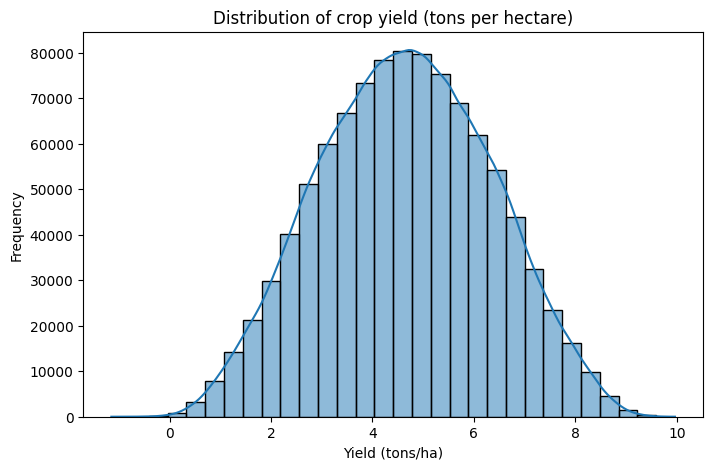

In [8]:
# Distribution of crop yield variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data['Yield_tons_per_hectare'], kde=True, bins=30)
plt.title("Distribution of crop yield (tons per hectare)")
plt.xlabel("Yield (tons/ha)")
plt.ylabel("Frequency")
plt.show()

**comment**  
The distribution is continuous and approximately normal (bell-shaped), with majority of the data around the mean. We also observe slight deviations such as a small tail below zero which should be impossible for yield but may be data noise or error.

The figure below shows a pairwise correlation matrix that shows the relationship between all the numerical features.

<Axes: >

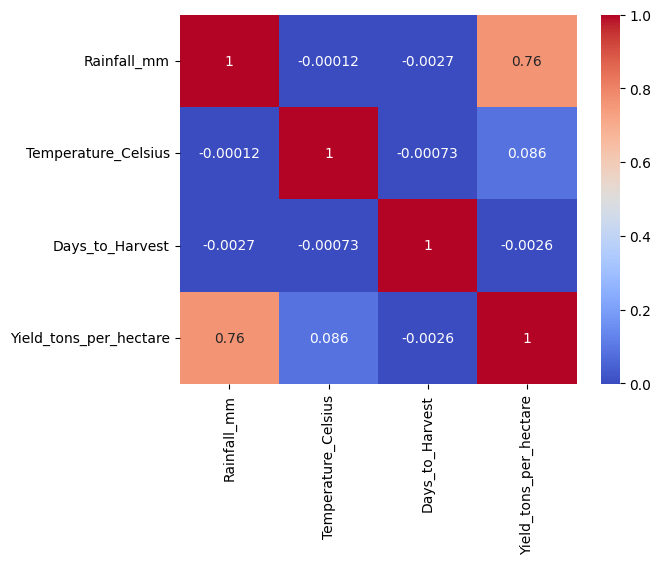

In [9]:
# visualizations of the relationships of the numerical features
numeric_data = ["Rainfall_mm", "Temperature_Celsius", "Days_to_Harvest", "Yield_tons_per_hectare"]
sns.heatmap(data[numeric_data].corr(), annot=True, cmap="coolwarm")

**comment:**  
There is a strong positive correlation of 0.76. This suggests that higher rainfall tends to be associated with a higher yield. Temperature and days to harvest have a weaker correlation to yield.

The figure below shows a boxplot showing the distribution of crop yield per crop type.

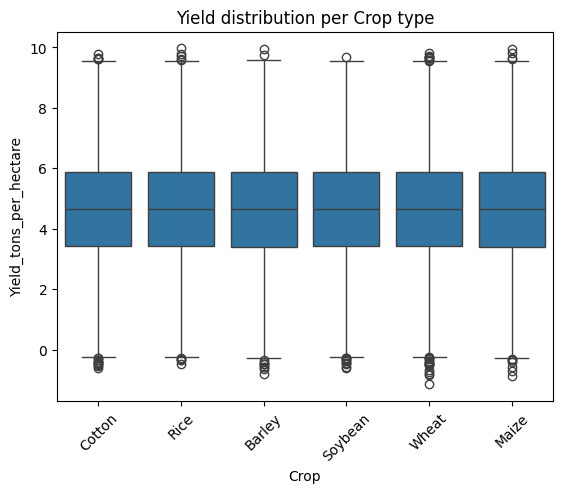

In [10]:
# distribution of yield per crop type
sns.boxplot(data, x='Crop', y='Yield_tons_per_hectare')
plt.xticks(rotation=45)
plt.title("Yield distribution per Crop type")
plt.show()


**comment**  
This distribution is balanced per category however there are outliers in each of the crop type. There are several negative observations and given that crop yield cannot be negative this should be investigated and dealt with.

The figure below shows the distribution of crop yield per region

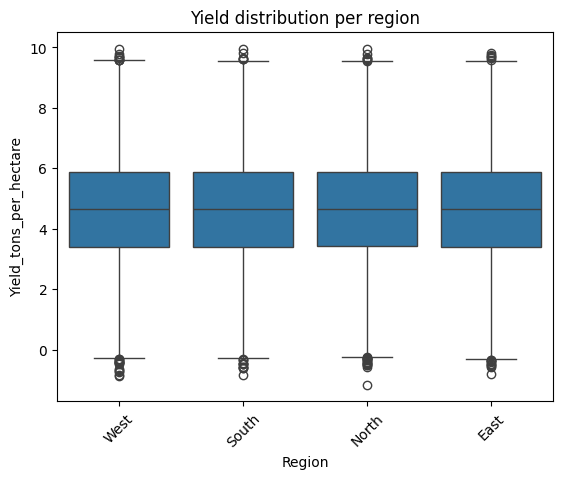

In [11]:
# distribution of yield per region
sns.boxplot(data, x='Region', y='Yield_tons_per_hectare')
plt.xticks(rotation=45)
plt.title("Yield distribution per region")
plt.show()

The distribution per region is also balanced and the negative outliers are also observed in this conntext.

## **Preprocessing**






**Managing outliers or missing values**  
We note that this data does not have missing values from the statistics. It however has some outliers in the `yield_tons_per_hectare` variable as seen from the box plot previously.

In [12]:
# missing values
data.isnull().sum()

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

**comment:**  
As earlier observed the data does not have missing values in any of the features

The table below shows the observations with a negative yield value

In [13]:
# number of negatives in yield_tons_per_hectare
data[data['Yield_tons_per_hectare'] < 0]

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
756,East,Peaty,Cotton,101.019421,33.804131,False,False,Rainy,117,-0.007103
7799,South,Chalky,Rice,108.804894,18.004082,False,False,Sunny,86,-0.061283
8421,East,Chalky,Soybean,168.120735,38.473430,False,False,Cloudy,111,-0.119911
9553,North,Silt,Wheat,156.607973,16.610257,False,False,Sunny,129,-0.193093
15435,South,Chalky,Maize,177.481344,27.719742,False,False,Sunny,94,-0.009811
...,...,...,...,...,...,...,...,...,...,...
975666,South,Clay,Barley,116.114046,16.257818,False,False,Sunny,70,-0.471038
982738,West,Loam,Wheat,235.792353,31.699429,False,False,Sunny,68,-0.255772
987054,West,Peaty,Barley,100.467398,15.735951,False,False,Rainy,96,-0.120282
995837,East,Chalky,Maize,105.575189,15.864764,False,False,Rainy,111,-0.051633


**comment:**  
The negative yield are 231 observations which is about 0.02% of the data given the 1,000,000 data points in the full dataset

To address the negative outliers we deleted them as they could be erroneous data within the data points. Crop yield cannot be negative unless comparing different years' production which is not the case in this context

In [14]:
# delete the ouliers (231 data points)
data2 = data[data['Yield_tons_per_hectare'] >= 0]


**comment:**  
We only deleted the negative values of crop yield , we also have some *outliers* on the positive end however these could be reralistic i.e. high yield due to optimal conditions such as high precipitation or best soil type etc

## **Evaluation protocol**

### **Revised Strategy**

> We adopted a hold-out + cross-validation strategy:
> 1. **Hold-out** We held out 20% of data as a test set ***(stratified by region)*** to obtain an unbiased estimate of generalization performance.
> **Justification:** Given the ~1 million data points, 20% test provides sufficient data to evaluate generalization. Stratified sampling ensures all geographic regions are proportionally represented in both  sets.
> 2. **Cross Validation:** We applied k-fold cross-validation on the remaining 80% for hyperparameter tuning and model selection.
> **Justification:** This approach balances computational efficiency with robust hyperparameter selection. While our large dataset would make even a single validation set statistically reliable, cross-validation provides more stable hyperparameter estimates by averaging across folds.  
> The final model is trained on the full 80% using the best hyperparameters identified through CV, then evaluated once on the held-out test set.

### **Metrics - Revised**  
> In this study, we will evaluate the performance of our crop yield estimation model using two commonly used regression metrics: Root Mean Squared Error (RMSE),Mean Absolute Error (MAE) and R².  
> **[1] RMSE** provides an indication of the model’s prediction error in the same units as the target variable and is particularly sensitive to large errors.  
> **[2] MAE**, on the other hand, measures the average magnitude of the errors regardless of their direction and is less influenced by outliers.  
> **[3] R²** the coefficient of determination explains how much of the variation in the target variable can be explained by the model. R² ranges from **-infinity to 1**  with **1** = perfect prediction (model predicts exactly the true values); **0** = model is no better than predicting the mean of the target; **Negative** = model is worse than just predicting the mean.

## **Data Splitting**   
Before we begin fitting the model we split the data into training and test sets using stratified sampling by region.

In [15]:
from sklearn.model_selection import train_test_split

data3 = data2.drop('Yield_tons_per_hectare', axis=1)
target = data2['Yield_tons_per_hectare']

# Split the data using STRATIFIED sampling by Region
X_train, X_test, Y_train, Y_test = train_test_split(
    data3,
    target,
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=data3['Region']  # NEW: Stratify by Region
)

# Save the original 'Region' column for stratification in CV
regions_train = X_train['Region'].copy()

print("Region distribution in training set:")
print(X_train['Region'].value_counts(normalize=True))
print("\nRegion distribution in test set:")
print(X_test['Region'].value_counts(normalize=True))

Region distribution in training set:
Region
North    0.250169
West     0.250072
South    0.250059
East     0.249700
Name: proportion, dtype: float64

Region distribution in test set:
Region
North    0.250173
West     0.250073
South    0.250058
East     0.249697
Name: proportion, dtype: float64


**comment:**  
We split the dataset using stratified sampling by Region to ensure that each geographic region is proportionally represented in both the training and test sets preventing bias in model evaluation.

## **Feature Engineering**  
**Feature Scaling and Categorical encoding**  
> We normalize the numerical features (Rainfall_mm, Temperature_Celsius, and Days_to_Harvest) because they are measured on different scales and units (e.g., rainfall in mm vs. temperature in degrees Celsius).  
This will ensure that features such as rainfall that have a larger numerical range do not overshadow the rest in the model training.  
> We will also encode the categorical features to enable the models to interpret them, as most algorithms require numerical input.
> * Nominal Features (`Region`, `Soil_Type`, `Crop`, and `Weather_Condition`): We will use One-Hot Encoding  because these categories are not ordered.
> * Binary Features (`Fertilizer_used` and `Irrigation_Used`): Since these features are simple True/False, we will use a binary mapping (True=1, False=0)


In [16]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the feature groups
numeric_features = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']
nominal_features = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']
binary_features = ['Fertilizer_Used', 'Irrigation_Used']

# transformer pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_features),
        ('bin', 'passthrough', binary_features)  # keep binary columns as they are
    ]
)

# Fit on training data and transform both sets
X_train_ = preprocessor.fit_transform(X_train)
X_test_ = preprocessor.transform(X_test)

# Get encoded column names
encoded_nominal_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(nominal_features)

# Combine column names
all_columns = numeric_features + list(encoded_nominal_cols) + binary_features

# Convert to DataFrame
X_train = pd.DataFrame(X_train_, columns=all_columns, index=X_train.index)
X_test = pd.DataFrame(X_test_, columns=all_columns, index=X_test.index)

print("\n---Training data after preprocessing---")
print("Shape:", X_train.shape)
print(X_train.head())



---Training data after preprocessing---
Shape: (799815, 24)
        Rainfall_mm  Temperature_Celsius  Days_to_Harvest  Region_East  \
67110     -0.842443            -0.560053        -1.059200          0.0   
256089    -0.514794            -0.152093         1.291262          0.0   
758491     1.385094             0.977473        -0.442686          1.0   
705578    -0.681220            -0.044716        -1.637183          0.0   
9025      -1.036053            -0.683357         0.405022          0.0   

        Region_North  Region_South  Region_West  Soil_Type_Chalky  \
67110            0.0           0.0          1.0               0.0   
256089           0.0           1.0          0.0               1.0   
758491           0.0           0.0          0.0               1.0   
705578           1.0           0.0          0.0               0.0   
9025             0.0           0.0          1.0               0.0   

        Soil_Type_Clay  Soil_Type_Loam  ...  Crop_Cotton  Crop_Maize  \
67110  

**comment:**  
After preprocessing the data is fully numeric ready for ML model with:
- Numeric features are standardized (mean ~0, variance ~1), ensuring all scales are comparable.
- Categorical features are one-hot encoded, expanding the feature set from 9 to 24 columns.
- Binary features remain as 0 or 1 integers.


## **ML Algorithms**   


> We first fit each model using default hyperparameters to baseline understanding on how the models capture the patterns in the data and compare them against the Dummy baseline. We will calculate training and testing error to assess model performance.

###**Dummy Regressor**  
A baseline model that predicts a constant value (e.g., the mean of the target variable). It provides a reference point to determine whether more complex models achieve meaningful improvement.

In [17]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# fit the model
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, Y_train)

# Predict
y_pred_train1 = dummy.predict(X_train)
y_pred_test1 = dummy.predict(X_test)

# Assess model
r2_train1 = r2_score(Y_train, y_pred_train1)
r2_test1 = r2_score(Y_test, y_pred_test1)

rmse_train1 = np.sqrt(mean_squared_error(Y_train, y_pred_train1))
rmse_test1 = np.sqrt(mean_squared_error(Y_test, y_pred_test1))

print("Dummy Regressor (Baseline)")
print(f"Train R²: {r2_train1:.4f}, Test R²: {r2_test1:.4f}")
print(f"Train RMSE: {rmse_train1:.4f}, Test RMSE: {rmse_test1:.4f}")


Dummy Regressor (Baseline)
Train R²: 0.0000, Test R²: -0.0000
Train RMSE: 1.6952, Test RMSE: 1.6949


**comment:**  
From the training and test set metrics, we observe that the Dummy Regressor baseline gives an R² of ~0, meaning the model only predicts the mean yield and does not capture any patterns in the data.  
The RMSE values (≈1.695 on train and test) indicate that, on average, the predictions deviate from the true yields by about 1.7 tons per hectare.

###**Ridge Regression**   
A linear regression model with L2 regularization that penalizes large coefficients. This helps to reduce overfitting and handle multicollinearity among predictors, making the model more stable when features are correlated.

In [18]:
from sklearn.linear_model import Ridge

# Fit the model
ridge = Ridge()
ridge.fit(X_train, Y_train)

# Predict
y_pred_train2 = ridge.predict(X_train)
y_pred_test2 = ridge.predict(X_test)

# Assess model
r2_train2 = r2_score(Y_train, y_pred_train2)
r2_test2 = r2_score(Y_test, y_pred_test2)

rmse_train2 = np.sqrt(mean_squared_error(Y_train, y_pred_train2))
rmse_test2 = np.sqrt(mean_squared_error(Y_test, y_pred_test2))

print("Ridge Regressor")
print(f"Train R²: {r2_train2:.4f}, Test R²: {r2_test2:.4f}")
print(f"Train RMSE: {rmse_train2:.4f}, Test RMSE: {rmse_test2:.4f}")


Ridge Regressor
Train R²: 0.9129, Test R²: 0.9132
Train RMSE: 0.5003, Test RMSE: 0.4993


/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self

**comment:**  
The Ridge Regression model achieves a high R² of 0.91 on both the training and test sets, indicating that it explains over 91% of the variation in crop yields.
The RMSE values (~0.50 tons per hectare) show that the predictions are, on average, within 0.5 tons per hectare of the true yields.   
Overall, with default parameters, the model captures most patterns in the data and generalizes well to unseen data.

###**Gradient Boost**  
An ensemble method that builds a sequence of shallow decision trees, where each new tree corrects the residuals (errors) of the previous ensemble, leading to high predictive accuracy through iterative learning.  

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

#fit model
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, Y_train)

# Predict
y_pred_train4 = gb_reg.predict(X_train)
y_pred_test4 = gb_reg.predict(X_test)

# Assess model
r2_train4 = r2_score(Y_train, y_pred_train4)
r2_test4 = r2_score(Y_test, y_pred_test4)

rmse_train4 = np.sqrt(mean_squared_error(Y_train, y_pred_train4))
rmse_test4 = np.sqrt(mean_squared_error(Y_test, y_pred_test4))

print("Gradient Boosting")
print(f"Train R²: {r2_train4:.4f}, Test R²: {r2_test4:.4f}")
print(f"Train RMSE: {rmse_train4:.4f}, Test RMSE: {rmse_test4:.4f}")


KeyboardInterrupt: 

**comment:**  
The Gradient Boosting model achieves an R² of 0.91 on both the training and test sets, showing that it captures the majority of the variation in crop yields.  
The RMSE values (~0.50 tons per hectare) indicate that, on average, predictions deviate by about 0.5 tons per hectare from the true values.  
Overall, the model fits the data well without overfitting and generalizes effectively to unseen data.

###**Random Forest**   
An ensemble learning method that builds multiple decision trees on random subsets of the data and features, then averages their predictions to reduce variance and improve generalization.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Fit the model
rf_reg = RandomForestRegressor(random_state=42, n_jobs=-1, oob_score=True)
rf_reg.fit(X_train, Y_train)

# Predict
y_pred_train5 = rf_reg.predict(X_train)
y_pred_test5 = rf_reg.predict(X_test)

# Assess model
r2_train5 = r2_score(Y_train, y_pred_train5)
r2_test5 = r2_score(Y_test, y_pred_test5)

rmse_train5 = np.sqrt(mean_squared_error(Y_train, y_pred_train5))
rmse_test5 = np.sqrt(mean_squared_error(Y_test, y_pred_test5))

print("Random Forest")
print(f"Train R²: {r2_train5:.4f}, Test R²: {r2_test5:.4f}")
print(f"Train RMSE: {rmse_train5:.4f}, Test RMSE: {rmse_test5:.4f}")
print('OOB error: ', round(1-rf_reg.oob_score_,2))


Random Forest
Train R²: 0.9871, Test R²: 0.9080
Train RMSE: 0.1928, Test RMSE: 0.5141
OOB error:  0.09


**comment:**  
The Random Forest model fits the training data very closely (R² ≈ 0.987, RMSE ≈ 0.19), indicating it captures almost all patterns in the training set. On the test set, R² drops slightly to ~0.908 and RMSE increases to ~0.51, showing that the model generalizes well but exhibits a small amount of overfitting.  
Overall, with default parameters, Random Forest provides strong predictive performance and outperforms simpler models like Ridge.

##**Hyperparameter Tuning**

> We have fitted all models using their default hyperparameters and evaluated them on the training and test sets to get an impression of their performance in terms of R² and RMSE allowing us to compare how well each model captures patterns in the data and generalizes to unseen yields.  
> In the next step, we will perform hyperparameter tuning, adjusting parameters such as regularization strength, tree depth, number of estimators, and learning rate. Cross-validation will be used during tuning to ensure that the selected hyperparameters lead to models that generalize well.  
> Once the best hyperparameters are identified, each model will be retrained on the full training set and evaluated on the test set to report the final, unbiased performance metrics.

In [20]:
# Columnas one-hot de región
region_cols = ['Region_East', 'Region_North', 'Region_South', 'Region_West']
region_names = ['East', 'North', 'South', 'West']

# Crear un array con los nombres de la región (solo para estratificación)
regions_for_stratify = np.array(region_names)[X_train[region_cols].values.argmax(axis=1)]

In [21]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Example: Cross-validation for hyperparameter tuning
def evaluate_model_cv(model, X, y, regions, cv_folds=5):
    """
    Evaluate model using stratified cross-validation.

    Parameters:
    -----------
    model : sklearn estimator
        Model to evaluate
    X : DataFrame
        Feature matrix
    y : Series
        Target variable
    regions : Series
        Region labels for stratification
    cv_folds : int
        Number of cross-validation folds

    Returns:
    --------
    dict : Cross-validation scores
    """
    # Create stratified folds based on Region
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)

    # Perform cross-validation
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=skf.split(X, regions),  # Stratify by region
        scoring={
            'neg_rmse': 'neg_root_mean_squared_error',
            'neg_mae': 'neg_mean_absolute_error',
            'r2': 'r2'
        },
        return_train_score=True
    )

    return {
        'test_rmse': -cv_results['test_neg_rmse'].mean(),
        'test_mae': -cv_results['test_neg_mae'].mean(),
        'test_r2': cv_results['test_r2'].mean(),
        'train_rmse': -cv_results['train_neg_rmse'].mean(),
        'train_mae': -cv_results['train_neg_mae'].mean(),
        'train_r2': cv_results['train_r2'].mean(),
    }

# Example usage with Ridge regression
print("Example: Evaluating Ridge Regression with Cross-Validation")
print("=" * 60)

# Try different alpha values
alphas = [0.1, 1.0, 10.0]
for alpha in alphas:
    model = Ridge(alpha=alpha)
    scores = evaluate_model_cv(
        model,
        X_train,
        Y_train,
        regions_for_stratify
    )
    print(f"\nAlpha = {alpha}")
    print(f"  CV RMSE: {scores['test_rmse']:.4f}")
    print(f"  CV MAE:  {scores['test_mae']:.4f}")
    print(f"  CV R²:   {scores['test_r2']:.4f}")


Example: Evaluating Ridge Regression with Cross-Validation


/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self


Alpha = 0.1
  CV RMSE: 0.5003
  CV MAE:  0.3992
  CV R²:   0.9129


/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self


Alpha = 1.0
  CV RMSE: 0.5003
  CV MAE:  0.3992
  CV R²:   0.9129


/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self


Alpha = 10.0
  CV RMSE: 0.5003
  CV MAE:  0.3992
  CV R²:   0.9129


/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/satimg-env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self

In [ ]:
def final_evaluation(model, X_train, y_train, X_test, y_test):
    """
    Train model on full training set and evaluate on test set.

    Parameters:
    -----------
    model : sklearn estimator
        Model with tuned hyperparameters
    X_train, y_train : Training data
    X_test, y_test : Test data

    Returns:
    --------
    dict : Test set performance metrics
    """
    # Train on full training set
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("FINAL MODEL PERFORMANCE ON TEST SET")
    print("=" * 50)
    print(f"RMSE: {rmse:.4f} tons/hectare")
    print(f"MAE:  {mae:.4f} tons/hectare")
    print(f"R²:   {r2:.4f}")
    print(f"\nInterpretation:")
    print(f"- The model's predictions are off by ±{rmse:.4f} tons/hectare (RMSE)")
    print(f"- On average, predictions deviate by {mae:.4f} tons/hectare (MAE)")
    print(f"- The model explains {r2*100:.2f}% of yield variation (R²)")

    return {'rmse': rmse, 'mae': mae, 'r2': r2}

# Example usage (after hyperparameter tuning):
# best_model = Ridge(alpha=1.0)  # Use best alpha from CV
# final_scores = final_evaluation(best_model, X_train_final, Y_train,
#                                  X_test_final, Y_test)

print("\n" + "="*70)
print("NEXT STEPS:")
print("="*70)
print("""
1. Run hyperparameter tuning using cross-validation
2. Select best model configuration based on CV scores
3. Train final model on full training set
4. Evaluate once on test set for final performance report
5. Compare results across different model types (e.g., Linear, Ridge, Lasso,
   Random Forest, etc.)
""")


NEXT STEPS:

1. Run hyperparameter tuning using cross-validation
2. Select best model configuration based on CV scores
3. Train final model on full training set
4. Evaluate once on test set for final performance report
5. Compare results across different model types (e.g., Linear, Ridge, Lasso,
   Random Forest, etc.)



In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import PredefinedSplit
import numpy as np
import pandas as pd

def tune_random_forest(param_grid, X, y, n_splits=3):
    """
    GridSearchCV for RandomForest with stratification by region.

    Parameters:
    -----------
    param_grid : dict
        Dictionary with hyperparameters to search
    X : DataFrame
        Training features
    y : Series or array
        Target variable
    region_cols : list
        List of region columns
    n_splits : int
        Number of folds for StratifiedKFold

    Returns:
    --------
    results_df : DataFrame
        DataFrame with all hyperparameter combinations and their metrics
    grid : GridSearchCV object
        Trained GridSearchCV object (for .best_params_, .best_score_, etc.)
    """
    
    # Base model
    rf_reg = RandomForestRegressor(random_state=42)
    
    # Stratified folds
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_indices = list(skf.split(X, regions_for_stratify))

    # Assign fold numbers for each sample
    fold_numbers = np.zeros(len(regions_for_stratify))
    for fold, (_, val_idx) in enumerate(fold_indices):
        fold_numbers[val_idx] = fold

    # PredefinedSplit object
    cv = PredefinedSplit(test_fold=fold_numbers)
    
    # Setup GridSearchCV with multiple scoring metrics
    grid = GridSearchCV(
        estimator=rf_reg,
        param_grid=param_grid,
        cv=cv,
        n_jobs=-1,
        verbose=2,
        scoring={
            'neg_rmse': 'neg_root_mean_squared_error',
            'neg_mae': 'neg_mean_absolute_error',
            'r2': 'r2'
        },
        refit='r2',  # use R² to select the best model
        return_train_score=True
    )
    
    # Fit GridSearchCV
    grid.fit(X, y)
    
    print("Best hyperparameters found:")
    print(grid.best_params_)
    print(f"Best CV R²: {grid.best_score_:.4f}")
    
    # Create DataFrame with all combinations and metrics
    results_df = pd.DataFrame(grid.cv_results_)
    
    # Convert negative metrics to positive values
    results_df['mean_train_rmse'] = -results_df['mean_train_neg_rmse']
    results_df['mean_test_rmse']  = -results_df['mean_test_neg_rmse']
    results_df['mean_train_mae']  = -results_df['mean_train_neg_mae']
    results_df['mean_test_mae']   = -results_df['mean_test_neg_mae']
    
    # Columns of interest
    display_cols = ['params', 'mean_train_rmse', 'mean_test_rmse',
                    'mean_train_mae', 'mean_test_mae', 'mean_train_r2', 'mean_test_r2']
    
    return results_df[display_cols], grid


In [25]:
param_grid = {
    'n_estimators': np.arange(50, 200, 20),  
    'max_features': ['sqrt'],
    'max_depth': [None],           
    'min_samples_leaf': [1],        
    'max_samples': [None]
}

tune_n_estimators = tune_random_forest(param_grid,X_train, Y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END max_depth=None, max_features=sqrt, max_samples=None, min_samples_leaf=1, n_estimators=50; total time=  58.4s
[CV] END max_depth=None, max_features=sqrt, max_samples=None, min_samples_leaf=1, n_estimators=50; total time=  58.7s
[CV] END max_depth=None, max_features=sqrt, max_samples=None, min_samples_leaf=1, n_estimators=50; total time=  59.3s
[CV] END max_depth=None, max_features=sqrt, max_samples=None, min_samples_leaf=1, n_estimators=70; total time= 1.5min
[CV] END max_depth=None, max_features=sqrt, max_samples=None, min_samples_leaf=1, n_estimators=70; total time= 1.5min
[CV] END max_depth=None, max_features=sqrt, max_samples=None, min_samples_leaf=1, n_estimators=70; total time= 1.5min
[CV] END max_depth=None, max_features=sqrt, max_samples=None, min_samples_leaf=1, n_estimators=90; total time= 2.1min
[CV] END max_depth=None, max_features=sqrt, max_samples=None, min_samples_leaf=1, n_estimators=90; total time= 2.1

In [61]:
# max_features tuning
param_grid = {
    'n_estimators': [190],
    'max_features': ['sqrt',0.5,0.75,1]
}
tune_max_features = tune_random_forest(param_grid,X_train, Y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...................max_features=1, n_estimators=190; total time= 3.0min
[CV] END ................max_features=sqrt, n_estimators=190; total time= 4.3min
[CV] END ................max_features=sqrt, n_estimators=190; total time= 4.3min
[CV] END ................max_features=sqrt, n_estimators=190; total time= 4.3min
[CV] END .................max_features=0.5, n_estimators=190; total time= 8.2min
[CV] END .................max_features=0.5, n_estimators=190; total time= 8.2min
[CV] END .................max_features=0.5, n_estimators=190; total time= 8.3min
[CV] END ...................max_features=1, n_estimators=190; total time= 3.5min
[CV] END ...................max_features=1, n_estimators=190; total time= 3.3min
[CV] END ................max_features=0.75, n_estimators=190; total time=11.3min
[CV] END ................max_features=0.75, n_estimators=190; total time=11.3min
[CV] END ................max_features=0.75, n_est

In [62]:
# max_features tuning
param_grid = {
    'n_estimators': [190],
    'max_features': [0.5],
    'max_depth': [10, 20, 30, None]
}
tune_max_depth = tune_random_forest(param_grid,X_train, Y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...max_depth=10, max_features=0.5, n_estimators=190; total time= 4.9min
[CV] END ...max_depth=10, max_features=0.5, n_estimators=190; total time= 4.9min
[CV] END ...max_depth=10, max_features=0.5, n_estimators=190; total time= 4.9min
[CV] END ...max_depth=20, max_features=0.5, n_estimators=190; total time= 7.8min
[CV] END ...max_depth=20, max_features=0.5, n_estimators=190; total time= 7.9min
[CV] END ...max_depth=20, max_features=0.5, n_estimators=190; total time= 7.9min
[CV] END ...max_depth=30, max_features=0.5, n_estimators=190; total time= 9.7min
[CV] END ...max_depth=30, max_features=0.5, n_estimators=190; total time= 9.7min
[CV] END ...max_depth=30, max_features=0.5, n_estimators=190; total time= 9.7min
[CV] END .max_depth=None, max_features=0.5, n_estimators=190; total time= 9.7min
[CV] END .max_depth=None, max_features=0.5, n_estimators=190; total time= 7.4min
[CV] END .max_depth=None, max_features=0.5, n_est

In [31]:
#min_samples_leaf tuning
param_grid = {
   'n_estimators': [190],
    'max_features': [0.5],
    'max_depth': [10],
    'min_samples_leaf': [1, 2, 4]
}
tune_min_samples_leaf = tune_random_forest(param_grid,X_train, Y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=2, n_estimators=190; total time= 3.7min
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=4, n_estimators=190; total time= 3.7min
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=1, n_estimators=190; total time= 3.7min
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=1, n_estimators=190; total time= 3.7min
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=2, n_estimators=190; total time= 3.7min
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=2, n_estimators=190; total time= 3.7min
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=4, n_estimators=190; total time= 3.7min
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=4, n_estimators=190; total time= 3.7min
[CV] END max_depth=10, max_features=0.5, min_samples_leaf=1, n_estimators=190; total time= 3.7min
Best hyperparameters found:
{'max_depth': 10, 'max_features

if we compare the train r2 and the test r2, the train is bigger with 0.95, while test is 0.9. with the default parameters Train R²: 0.9871, Test R²: 0.9080, Train RMSE: 0.1928, Test RMSE: 0.5141

In [39]:
#max_samples tuning

param_grid = {
   'n_estimators': [190],
    'max_features': [0.5],
    'max_depth': [10],
    'min_samples_leaf': [4],
    'max_samples': np.arange(0.1, 1, 0.1)
}
tune_max_samples = tune_random_forest(param_grid,X_train, Y_train)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END max_depth=10, max_features=0.5, max_samples=0.1, min_samples_leaf=4, n_estimators=190; total time=  31.1s
[CV] END max_depth=10, max_features=0.5, max_samples=0.1, min_samples_leaf=4, n_estimators=190; total time=  31.2s
[CV] END max_depth=10, max_features=0.5, max_samples=0.1, min_samples_leaf=4, n_estimators=190; total time=  31.2s
[CV] END max_depth=10, max_features=0.5, max_samples=0.2, min_samples_leaf=4, n_estimators=190; total time=  60.0s
[CV] END max_depth=10, max_features=0.5, max_samples=0.2, min_samples_leaf=4, n_estimators=190; total time= 1.0min
[CV] END max_depth=10, max_features=0.5, max_samples=0.2, min_samples_leaf=4, n_estimators=190; total time= 1.0min
[CV] END max_depth=10, max_features=0.5, max_samples=0.30000000000000004, min_samples_leaf=4, n_estimators=190; total time= 1.5min
[CV] END max_depth=10, max_features=0.5, max_samples=0.30000000000000004, min_samples_leaf=4, n_estimators=190; total t

In [54]:
tune_n_estimators[0]

,params,mean_train_rmse,mean_test_rmse,mean_train_mae,mean_test_mae,mean_train_r2,mean_test_r2
0,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.203501,0.530628,0.159833,0.423310,0.985590,0.902024
1,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.200529,0.528593,0.158199,0.421706,0.986008,0.902774
2,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.198899,0.527506,0.157302,0.420834,0.986234,0.903174
3,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.197936,0.527195,0.156787,0.420605,0.986367,0.903288
4,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.197067,0.526460,0.156260,0.420037,0.986487,0.903557
5,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.196429,0.525996,0.155881,0.419677,0.986574,0.903727
6,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.196007,0.525711,0.155637,0.419437,0.986632,0.903831
7,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.195661,0.525496,0.155447,0.419262,0.986679,0.903910


In [52]:
tune_n_estimators[0]['params'][0]['n_estimators']

np.int64(50)

In [55]:
tune_n_estimators[0]['mean_test_r2']

0    0.902024
1    0.902774
2    0.903174
3    0.903288
4    0.903557
5    0.903727
6    0.903831
7    0.903910
Name: mean_test_r2, dtype: float64

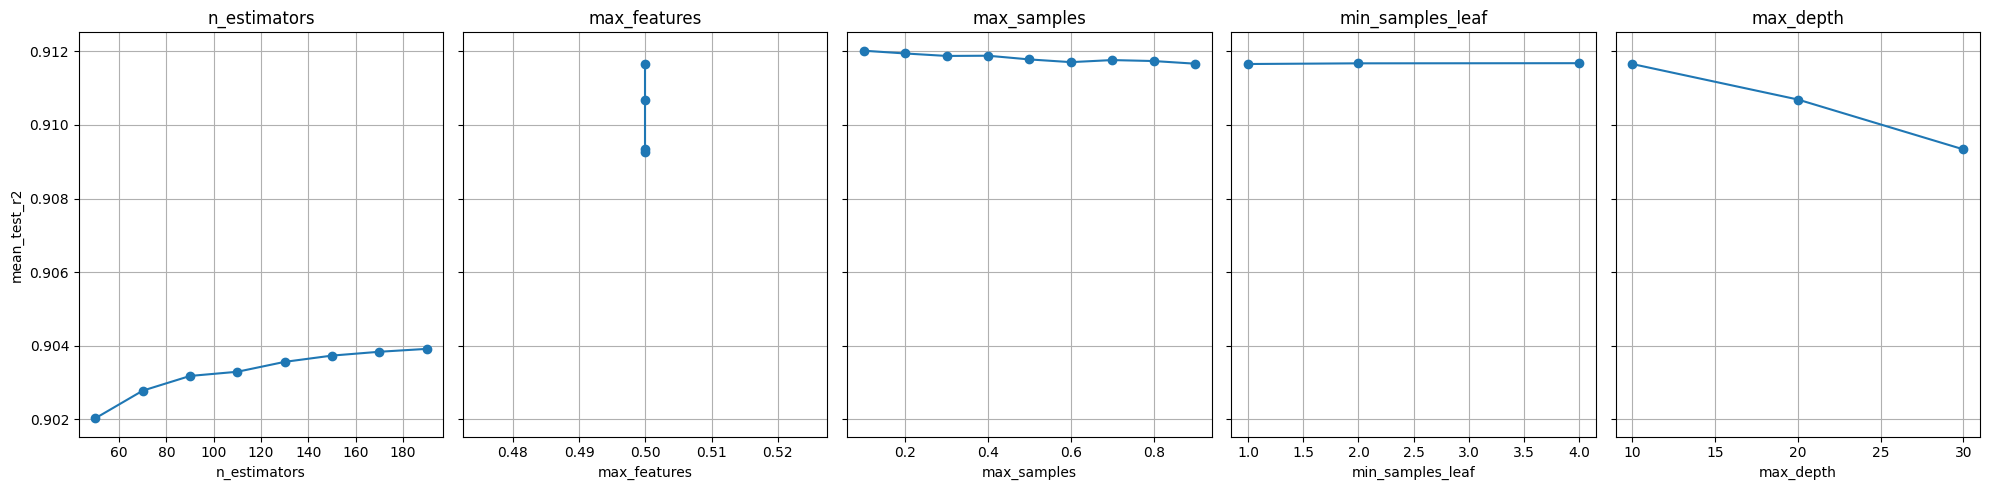

In [ ]:
import matplotlib.pyplot as plt

# Lista con todos los resultados y sus nombres
tune_results = [
    ("n_estimators", tune_n_estimators),
    ("max_features", tune_max_features),
    ("max_samples", tune_max_samples),
    ("min_samples_leaf", tune_min_samples_leaf),
    ("max_depth", tune_max_depth)
]

fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

for i, (param_name, tune_data) in enumerate(tune_results):
    ax = axes[i]
    param_values = [p[param_name] for p in tune_data[0]['params']]
    mean_r2 = tune_data[0]['mean_test_r2']
    
    ax.plot(param_values, mean_r2, marker='o')
    ax.set_title(param_name)
    ax.set_xlabel(param_name)
    if i == 0:
        ax.set_ylabel("mean_test_r2")
    ax.grid(True)

plt.tight_layout()
plt.show()



List the theoretical and empirical (from your experiments) advantages and disadvantages of each algorithm.
This information can be summarized in a double-entry table.

If you had to advise a company or a research institute, explain the algorithm you would deploy. Justify
your choice.

If you had to advise a company or a research institute, explain the algorithm you would deploy. Justify
your choice.

> Parameters chosen to be tuned based on [scikit documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html):  

> * n_estimators: Number of trees in the forest.
> * max_features: Number of features to consider when looking for the best split.
> * max_depth: Maximum depth of each tree.
> * min_samples_leaf: Minimum number of samples required to be at a leaf node.
> * max_samples: Number of samples to draw from the dataset to train each individual tree.